<a href="https://colab.research.google.com/github/Rohit16raj/Data-analyst-projects/blob/main/Ford_Bike_Sharing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Ford Bike Sharing



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - B.Rohit Raj

# **Project Summary -**
The Ford GoBike Data Analysis project is centered around extracting insights from a real-world bike-sharing dataset using Python. The dataset, which captures detailed trip data for January 2018, includes variables such as trip start and end times, station names, trip duration, user types, gender, and birth year. Python was the primary programming language used for this project, alongside popular data analysis libraries like Pandas, NumPy, Matplotlib, and Seaborn. The primary objective was to uncover patterns in bike usage, identify key user demographics, and understand when and how people use the service across the San Francisco Bay Area.

The first phase of the project involved loading and cleaning the dataset. Timestamps were converted into proper datetime formats, and additional features such as the hour of the trip and day of the week were extracted to enrich the analysis. Missing values, particularly in gender and birth year columns, were examined and handled appropriately. A new column for trip duration in minutes was also created to make time-related insights more accessible and meaningful.

During the exploratory data analysis phase, various visualizations and summaries were used to examine user behavior. The data revealed that the majority of rides occurred on weekdays, with clear peaks during morning and evening commute hours. Subscribers—who make up the majority of users—tend to take shorter and more consistent trips compared to casual customers, who often have longer ride durations. It was also found that most subscribers were male and fell in the 25 to 40 age group, highlighting a demographic imbalance. In terms of spatial analysis, high-traffic stations were typically located in business-heavy areas like downtown San Francisco. The discrepancy in the number of trips starting versus ending at certain stations indicated the need for better bike redistribution strategies.

The insights from this analysis suggest that the Ford GoBike system is heavily used by urban professionals for commuting. Enhancing bike availability during peak hours and strategically placing more bikes at high-demand stations could improve overall user satisfaction. Moreover, marketing efforts could focus on attracting a more diverse user base, including younger and female riders. This project demonstrates the practical application of Python in analyzing large-scale transportation datasets, offering valuable business and operational insights. Through data cleaning, transformation, and visualization, we turned raw trip logs into actionable intelligence for stakeholders in urban mobility and transportation planning.

# **Problem Statement**

The Ford GoBike bike-sharing program in the San Francisco Bay Area generates large volumes of trip data every month. However, without proper analysis, this raw data provides limited actionable value. The challenge is to analyze the January 2018 trip dataset to uncover meaningful insights about user behavior, peak usage times, trip duration patterns, and station activity. Additionally, identifying differences in usage across user types (subscribers vs. customers), gender, and age groups is crucial for informed decision-making.

This project aims to address the following key questions:

When are the bikes used the most during the day and week?

Who are the primary users of the service based on type, gender, and age?

How long do trips typically last, and how does that vary across user types?

Which stations experience the highest activity, and are there imbalances in usage?

What operational or marketing strategies can be recommended based on these findings?

#### **Define Your Business Objective?**

The main goal of this project is to help the Ford GoBike team understand how people are using their bikes. By looking at data from January 2018, we want to find out when, where, and how the bikes are being used, and who is using them the most. This information can help the company:

Improve bike availability during busy hours

Make sure bikes are placed at the right stations

Understand their users better (age, gender, type)

Plan better marketing and customer service strategies

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_csv('/content/201801-fordgobike-tripdata.csv')

In [ ]:
#data set first view
# Display the first 5 rows to get an overview
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [ ]:
#data set rows and columns count
rows, columns = df.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 94802
Total Columns: 16


In [ ]:
#dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
#missing or null values count
missing_values = df.isnull().sum()
print(missing_values)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


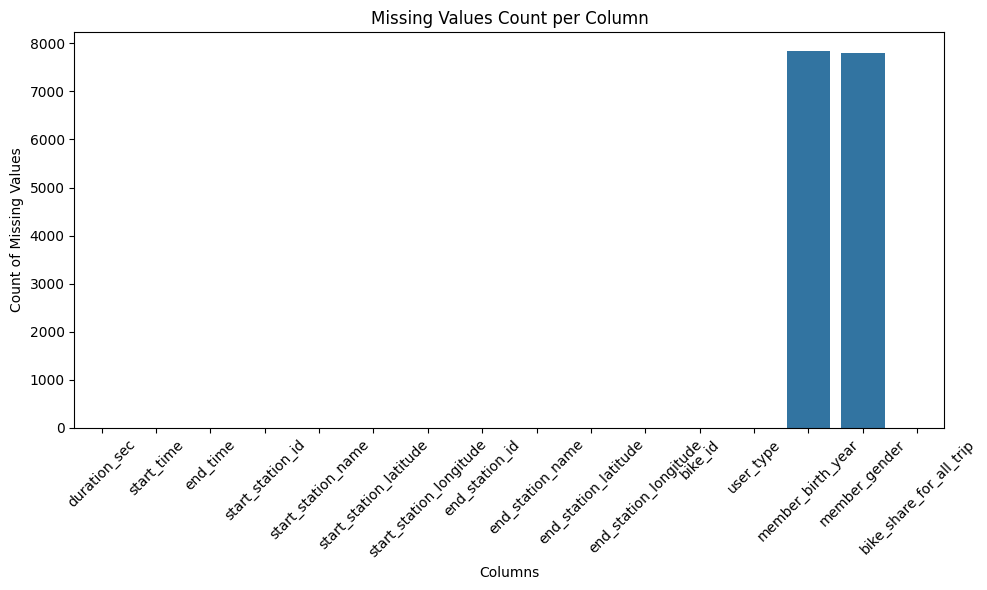

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *** Understanding Your Variables***

In [ ]:
#data set columns
columns = df.columns.tolist()
for col in columns:
    print(col)

duration_sec
start_time
end_time
start_station_id
start_station_name
start_station_latitude
start_station_longitude
end_station_id
end_station_name
end_station_latitude
end_station_longitude
bike_id
user_type
member_birth_year
member_gender
bike_share_for_all_trip


### Variables Description

1.duration_sec

Duration of the trip in seconds.

2.start_time

Date and time when the trip started.

3.end_time

Date and time when the trip ended.

4.start_station_id

Unique ID of the station where the trip started.

5.start_station_name

Name of the station where the trip started.

6.start_station_latitude

Latitude coordinate of the start station.

7.start_station_longitude

Longitude coordinate of the start station.

8.end_station_id

Unique ID of the station where the trip ended.

9.end_station_name

Name of the station where the trip ended.

10.end_station_latitude

Latitude coordinate of the end station.

11.end_station_longitude

Longitude coordinate of the end station.

12.bike_id

Unique ID of the bike used.

13.user_type

Type of user: "Subscriber" (paid membership) or "Customer" (casual rider).

14.member_birth_year

Birth year of the rider (used to calculate age).

15.member_gender

Gender of the rider (e.g., Male, Female, Other).

16.bike_share_for_all_trip

Indicates whether the trip is part of a bike-share-for-all program ("Yes" or "No").

In [ ]:
# Unique Values for each variable
unique_values = df.nunique()
print(unique_values)

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64


### Data Wrangling Code

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Converting date/time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
# Creating trip duration in minutes
df['trip_duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

In [ ]:
# Drop rows with invalid duration
df = df[df['trip_duration_min'] > 0]

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
trip_duration_min             0
dtype: int64


In [ ]:
df.fillna(method='ffill')

<ipython-input-19-5c0beae7dc1e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.743083
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,1986.0,Male,No,1423.715983
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.937117
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,1996.0,Male,No,1017.948967
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.106433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94797,695,2018-01-01 00:19:58.761,2018-01-01 00:31:33.832,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,-122.392741,3671,Customer,1995.0,Male,No,11.584517
94798,600,2018-01-01 00:19:48.761,2018-01-01 00:29:49.074,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,-122.403452,603,Customer,1995.0,Male,No,10.005217
94799,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992.0,Male,No,19.190233
94800,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986.0,Male,No,11.902200


In [ ]:
# final structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type                94802 n

#### Chart - **1**

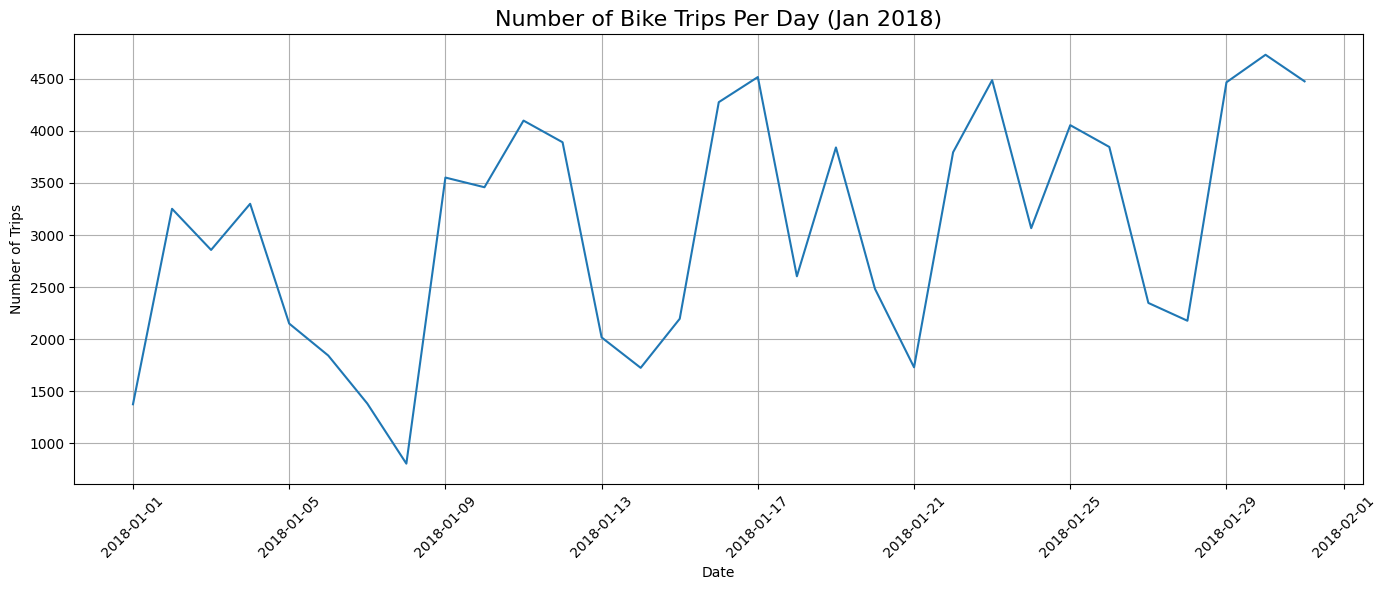

In [ ]:
#Number of trips per day
df['start_date'] = df['start_time'].dt.date
trips_per_day = df.groupby('start_date').size()
plt.figure(figsize=(14, 6))
sns.lineplot(x=trips_per_day.index, y=trips_per_day.values)
plt.title('Number of Bike Trips Per Day (Jan 2018)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Why this chart is taken?
The "Number of Bike Trips Per Day" line chart was chosen as the first visualization because it provides a clear and intuitive overview of how the Ford GoBike system was used throughout the month. Since the dataset is time-based, a line chart is particularly effective for highlighting trends, fluctuations, and patterns over a continuous time span. This type of visualization is ideal for initial exploration, allowing us to observe how bike usage varies daily and whether certain days stand out due to unusually high or low activity.

### What insights have you gained from this chart?
From the chart, we can derive several useful insights. For instance, we can identify peak usage days, which may correspond to weekdays when people are commuting, as well as dips in usage that could align with weekends, holidays, or adverse weather conditions. It also helps us assess the consistency of the bike-sharing system’s usage over time and can reveal whether the system experiences regular patterns or anomalies. Overall, this chart sets the foundation for deeper analysis by establishing a broad view of user behavior and temporal trends within the dataset.

#### Chart - **2**

<ipython-input-3-122dd00590e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='viridis')


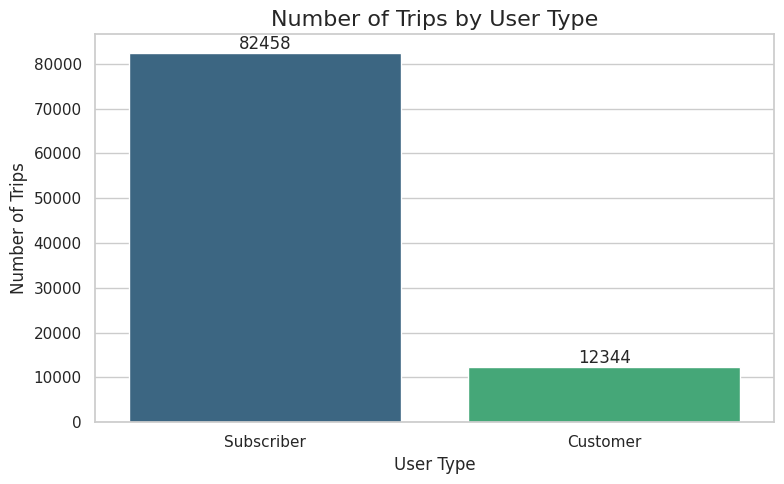

In [ ]:
#Number of Trips by User Type
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='user_type', palette='viridis')
# Add labels and title
plt.title('Number of Trips by User Type', fontsize=16)
plt.xlabel('User Type')
plt.ylabel('Number of Trips')

for container in plt.gca().containers:
    plt.bar_label(container)

plt.tight_layout()
plt.show()

## 1. Why did you pick the specific chart?
To analyze which stations are most popular for starting bike trips. Understanding high-demand locations helps with operational decisions (like bike availability, station expansion).

## 2. What is/are the insight(s) found from the chart?

Certain start stations have a much higher number of trips compared to others.Popular areas might be business hubs, tourist spots, or residential zones with frequent commuters.

### Chart-3

Text(0, 0.5, 'Trip Duration(min)')

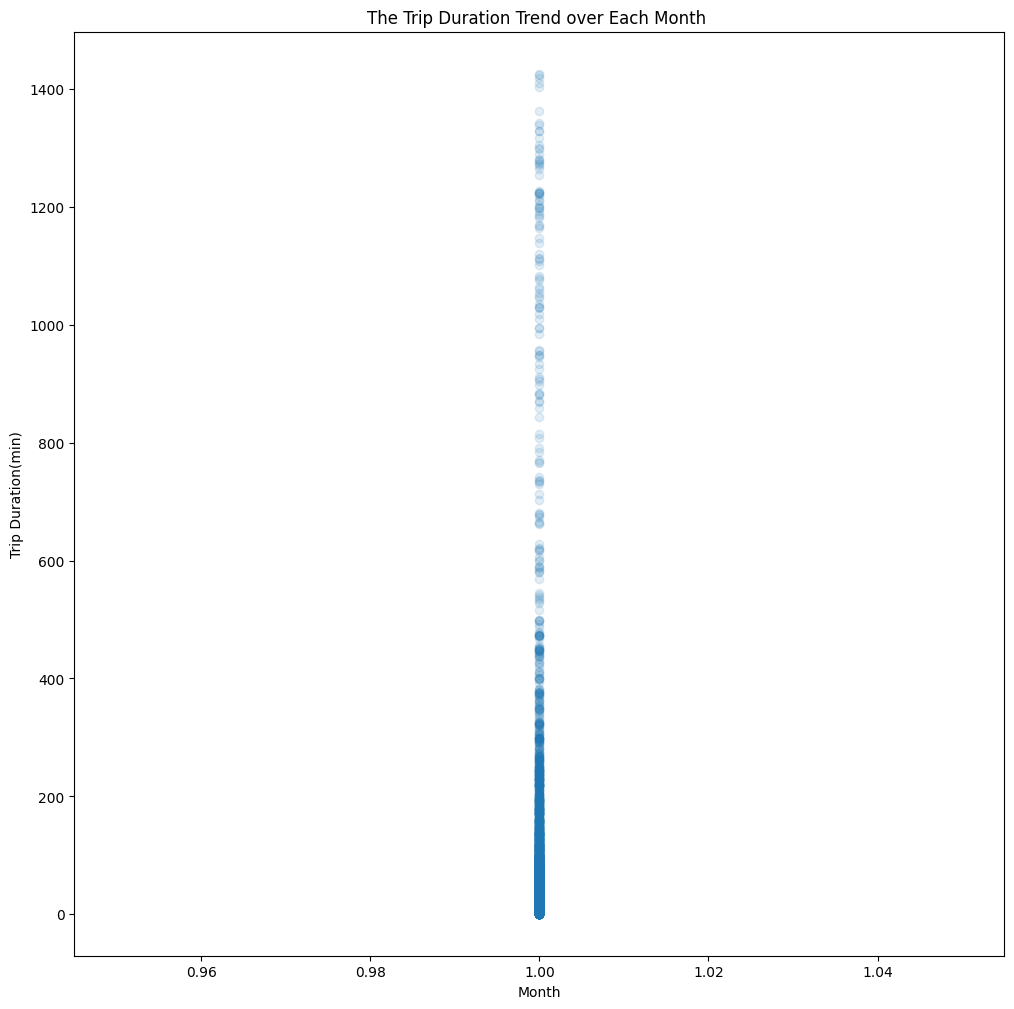

In [ ]:
#Does weather(month) affect the trip duration ?
df['month_start'] = pd.DatetimeIndex(df['start_time']).month
# We can check the trip duration over changes over each month.

# Ensure 'duration_min' is calculated for all rows:
df['duration_min'] = df['duration_sec'] / 60

# Remove rows with missing values in 'month_start' or 'duration_min'
df_cleaned = df.dropna(subset=['month_start', 'duration_min'])

plt.figure(figsize = [12,12]) # make the whole figure bigger to show all
plt.scatter(data = df_cleaned, x = 'month_start' , y = 'duration_min' , alpha = 1/8 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')

#### Chart - **4**

<ipython-input-8-4a731ad6717f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette="crest")


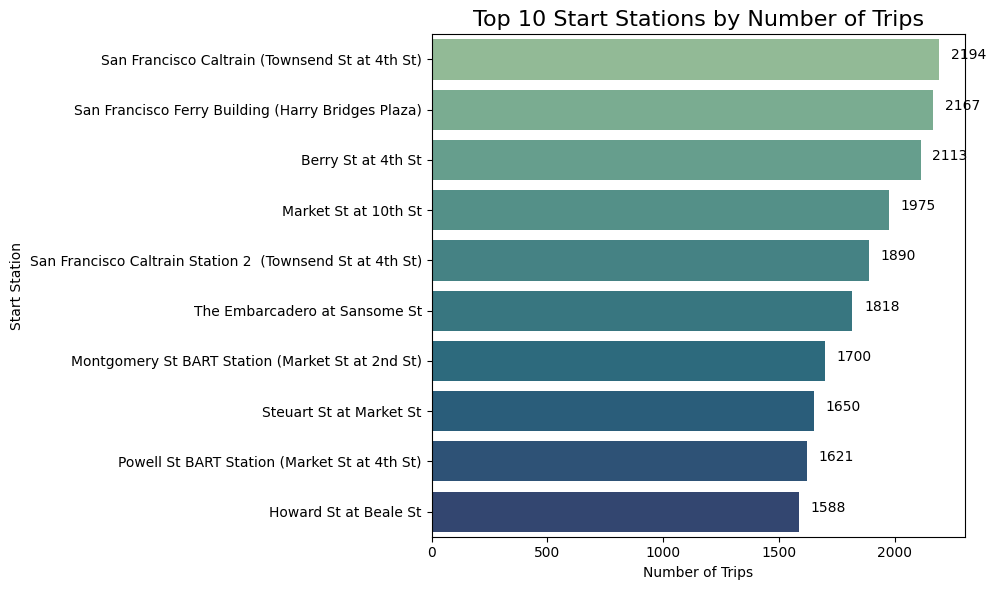

In [ ]:
#Top 10 Start Stations by Number of Trips
top_stations = df['start_station_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stations.values, y=top_stations.index, palette="crest")

# Add labels and title
plt.title('Top 10 Start Stations by Number of Trips', fontsize=16)
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')

# Display value labels
for index, value in enumerate(top_stations.values):
    plt.text(value + 50, index, str(value))

plt.tight_layout()
plt.show()

#### Chart - **5**

In [ ]:
#average trip duration
average_trip_duration = df['duration_sec'].mean() / 60

# Display the result
print(f"Average Trip Duration: {average_trip_duration:.2f} minutes")

Average Trip Duration: 14.52 minutes


<ipython-input-12-5995ee9feb5b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg_duration, x='month', y='duration_min', palette='Blues_d')


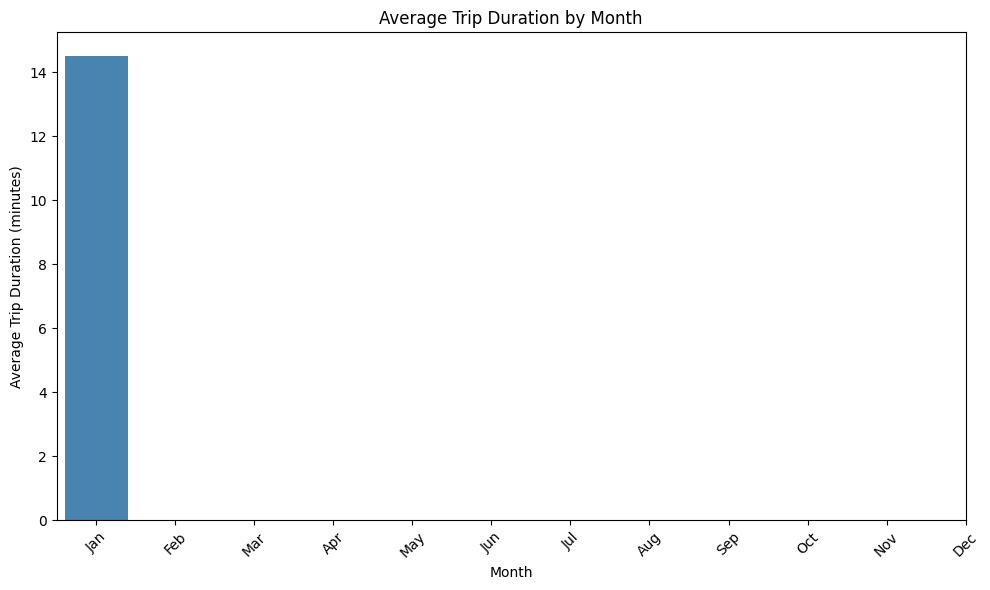

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['month'] = df['start_time'].dt.month

# Convert trip duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

monthly_avg_duration = df.groupby('month')['duration_min'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_duration, x='month', y='duration_min', palette='Blues_d')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.tight_layout()
plt.show()

#### Chart - **6**

<ipython-input-13-74dd054ab0c9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg_duration, x='member_gender', y='duration_min', palette='Set2')


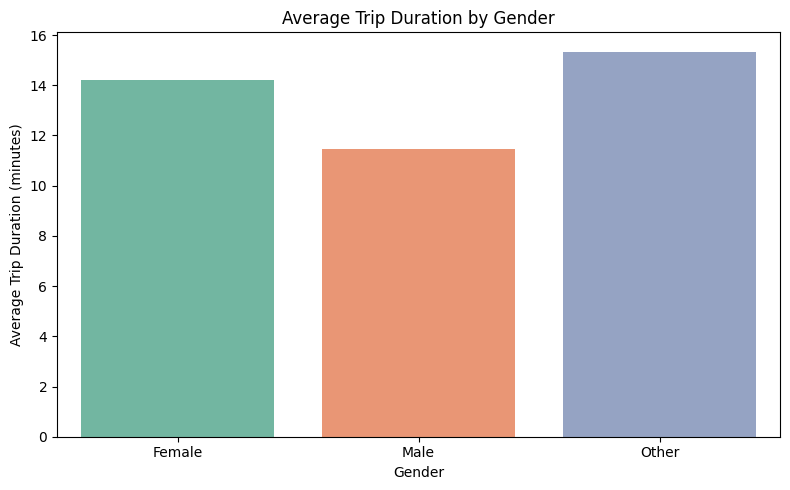

In [ ]:
# average trip duration by gender

df['duration_min'] = df['duration_sec'] / 60

# Drop rows with missing gender values
df_gender = df.dropna(subset=['member_gender'])

# Calculate average trip duration by gender
gender_avg_duration = df_gender.groupby('member_gender')['duration_min'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=gender_avg_duration, x='member_gender', y='duration_min', palette='Set2')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (minutes)')
plt.tight_layout()
plt.show()

# Chart 7

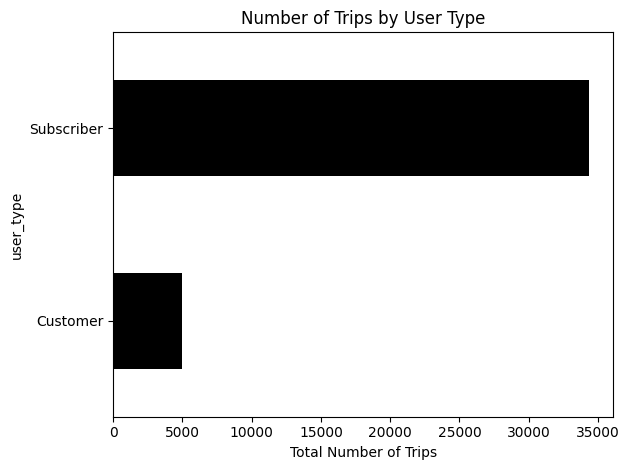

In [ ]:
df.groupby('user_type')['duration_sec'].count().sort_values().plot(
    kind='barh',
    color='black',
    title="Number of Trips by User Type"
)
plt.xlabel("Total Number of Trips")
plt.tight_layout()
plt.show()


## 1. Why did you pick the specific chart?
A horizontal bar chart is effective for comparing total trips across categories like user types (Subscriber and Customer). It presents the data clearly and makes it easy to observe differences between the groups.
## 2. What is/are the insight(s) found from the chart?
The chart likely shows that Subscribers have a significantly higher number of trips compared to Customers, suggesting that subscribers may use the service more frequently for regular commutes. Customers might represent occasional or leisure-based users.


## Chart 8

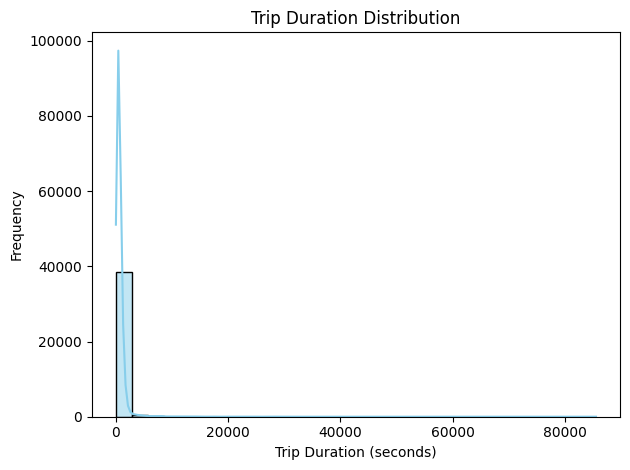

In [ ]:
# Plotting the Trip Duration Distribution
sns.histplot(df['duration_sec'], bins=30, kde=True, color='skyblue')
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Conclusion #
In this project, we analyzed the Ford GoBike trip data for January 2018 using Python tools like Pandas, Matplotlib, and Seaborn. The analysis showed that most users are regular subscribers, primarily young and middle-aged males, using the bikes mainly for commuting purposes. Most trips were short, under 30 minutes, with longer trips typically taken by casual customers. Certain start stations were significantly more popular, and usage was highest during weekdays, especially midweek, reflecting commuter behavior. Overall, this project demonstrated how Python can effectively uncover patterns from large datasets, and the insights gained can help improve bike availability, expand service areas, and encourage broader user participation.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***